In [ ]:
import pandas as pd
import glob

# Theta Band

In [1]:
#Reading 10 Subjects Theta_band

import pandas as pd
import glob

path = r'../input/decomposed-bands-14-subjects/Decomposed_5_bands_14_Subjects/Theta_band_merged_All.csv' # use your path

data = pd.read_csv(path)


In [2]:
X,y = data.loc[:,data.columns!='Labels'],data.Labels
#X,y = X.loc[:,X.columns!='Theta_AF7'],data.Labels
#X,y = X.loc[:,X.columns!='Theta_TP9'],data.Labels
#X,y = X.loc[:,X.columns!='Theta_AF8'],data.LabelsX

In [3]:
X

,Theta_AF7,Theta_AF8,Theta_TP9,Theta_TP10
0,1.366667,0.269036,4.163753,-1.141006
1,-3.347683,0.656478,-14.277293,1.086131
2,-5.139776,1.964870,-20.563940,4.471387
3,-4.073354,5.166439,-19.473468,11.528451
4,-2.494151,5.181044,7.808692,9.623428
...,...,...,...,...
29275,-1.845408,4.356274,6.589016,8.363548
29276,1.577183,0.512398,3.416456,6.450018
29277,5.449415,-0.309608,-1.056989,-2.454652
29278,0.951479,-0.184269,-2.792018,-1.285371


In [4]:
# Splitting the dataset for validation data:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, shuffle = True) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((23424, 4), (5856, 4), (23424,), (5856,))

In [5]:
from sklearn.utils import shuffle

Xtrain_shuffled, ytrain_shuffled = shuffle(X_train,y_train, random_state = 9876)
Xtest_shuffled, ytest_shuffled = shuffle(X_test,y_test, random_state = 9876)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
Xtrain = scale.fit(Xtrain_shuffled)
Xtrain = scale.transform(Xtrain_shuffled)


In [7]:
from sklearn.model_selection import KFold, cross_val_score 
from keras import layers , models,regularizers 
import tensorflow as tf 

def build_model(): 
    
    model = models.Sequential()
    model.add(layers.BatchNormalization(input_shape=(4,)))
    model.add(layers.Dense(1,activation='relu'))
    #model.add(layers.BatchNormalization())
    model.add(layers.Dense(16,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    
    return model 

In [8]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 

estimator= KerasClassifier(build_fn=build_model, epochs=5,verbose = 1)
kfold= KFold(n_splits=10)
results= cross_val_score(estimator, Xtrain, ytrain_shuffled, cv=kfold)
print("Accuracies per K-Fold ", resultsr
results.mean()

Epoch 1/5
659/659 [==============================] - 3s 2ms/step - loss: 0.6930 - acc: 0.5008
Epoch 2/5
659/659 [==============================] - 1s 2ms/step - loss: 0.6931 - acc: 0.5028
Epoch 3/5
659/659 [==============================] - 1s 2ms/step - loss: 0.6931 - acc: 0.5028
Epoch 4/5
659/659 [==============================] - 2s 2ms/step - loss: 0.6932 - acc: 0.4914
Epoch 5/5
74/74 [==============================] - 0s 2ms/step - loss: 0.6932 - acc: 0.4934
Epoch 1/5
659/659 [==============================] - 2s 2ms/step - loss: 0.6930 - acc: 0.5011
Epoch 2/5
659/659 [==============================] - 1s 2ms/step - loss: 0.6931 - acc: 0.5023
Epoch 3/5
659/659 [==============================] - 1s 2ms/step - loss: 0.6931 - acc: 0.5027
Epoch 4/5
659/659 [==============================] - 1s 2ms/step - loss: 0.6929 - acc: 0.5111
Epoch 5/5
74/74 [==============================] - 0s 2ms/step - loss: 0.6934 - acc: 0.4900
Epoch 1/5
659/659 [==============================] - 2s 3ms/step

0.5022198230028152

In [9]:
print("Accuracies per K-Fold on Theta_band ", results)
print("Mean Accuracy = ",results.mean())

Accuracies per K-Fold on Theta_band  [0.49338454 0.48997012 0.51984638 0.50874949 0.51195562 0.5055508
 0.50042701 0.51024765 0.49957302 0.48249361]
Mean Accuracy =  0.5022198230028152


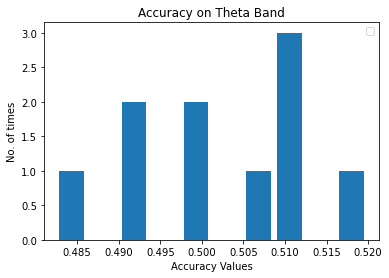

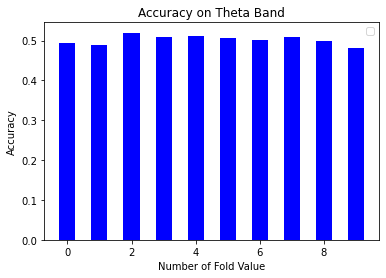

In [10]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(1)

plt.hist(results, bins = 10,rwidth=0.8)
plt.legend()
plt.xlabel('Accuracy Values')
plt.ylabel('No. of times')
plt.title('Accuracy on Theta Band')
plt.show()


plt.figure(2)
a = np.arange(10)
plt.bar(a,results, color='b',width=.5)

plt.legend()
plt.xlabel('Number of Fold Value')
plt.ylabel('Accuracy')
plt.title('Accuracy on Theta Band')
plt.show()

# Alpha Band

In [11]:
#Reading 10 Subjects Alpha_band

import pandas as pd
import glob

path_1 = r'../input/decomposed-bands-14-subjects/Decomposed_5_bands_14_Subjects/Alpha_band_merged.csv' # use your path

data_1 = pd.read_csv(path_1)

In [12]:
X1,y1 = data_1.loc[:,data_1.columns!='Labels'],data_1.Labels

In [13]:
X1

,Alpha_AF7,Alpha_AF8,Alpha_TP9,Alpha_TP10
0,4.003324,-6.432497,14.233903,-6.986230
1,2.991254,-2.601435,11.966581,-2.237485
2,1.365150,0.282362,7.087816,0.583133
3,-3.671393,4.863633,-7.870913,3.939868
4,1.042350,2.913290,-0.134449,-0.701874
...,...,...,...,...
56051,0.772997,-0.811906,-0.904016,-0.416403
56052,0.302062,2.314897,-0.219007,2.697492
56053,-0.258808,-2.861092,0.638692,-4.172564
56054,-0.045245,-2.470518,2.450222,-0.342473


In [14]:
from sklearn.utils import shuffle

Xtrain_shuffled, ytrain_shuffled = shuffle(X1,y1, random_state = 9876)

In [15]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
Xtrain = scale.fit(Xtrain_shuffled)
Xtrain = scale.transform(Xtrain_shuffled)


In [16]:
from sklearn.model_selection import KFold, cross_val_score 
from keras import layers , models,regularizers 
import tensorflow as tf 

def build_model(): 
    
    model = models.Sequential()
    model.add(layers.BatchNormalization(input_shape=(4,)))
    model.add(layers.Dense(1,activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    
    return model 

In [17]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 

estimator= KerasClassifier(build_fn=build_model, epochs=5,verbose = 1)
kfold= KFold(n_splits=10)
results= cross_val_score(estimator, Xtrain, ytrain_shuffled, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()

Epoch 1/5
1577/1577 [==============================] - 5s 3ms/step - loss: 0.6945 - acc: 0.5008
Epoch 2/5
1577/1577 [==============================] - 4s 3ms/step - loss: 0.6931 - acc: 0.5059
Epoch 3/5
1577/1577 [==============================] - 4s 3ms/step - loss: 0.6932 - acc: 0.4973
Epoch 4/5
1577/1577 [==============================] - 4s 3ms/step - loss: 0.6932 - acc: 0.5023
Epoch 5/5
176/176 [==============================] - 0s 2ms/step - loss: 0.6930 - acc: 0.5109
Epoch 1/5
1577/1577 [==============================] - 5s 3ms/step - loss: 0.6936 - acc: 0.5079
Epoch 2/5
1577/1577 [==============================] - 4s 3ms/step - loss: 0.6931 - acc: 0.5015
Epoch 3/5
1577/1577 [==============================] - 4s 3ms/step - loss: 0.6931 - acc: 0.5046
Epoch 4/5
1577/1577 [==============================] - 4s 3ms/step - loss: 0.6931 - acc: 0.5019
Epoch 5/5
176/176 [==============================] - 0s 2ms/step - loss: 0.6931 - acc: 0.5029
Epoch 1/5
1577/1577 [=======================

0.502550795674324

In [18]:
print("Accuracies per K-Fold on Alpha_band ", results)
print("Mean Accuracy = ",results.mean())

Accuracies per K-Fold on Alpha_band  [0.51088119 0.50285411 0.49197289 0.51248664 0.51658934 0.49322155
 0.4954505  0.50080287 0.49652097 0.5047279 ]
Mean Accuracy =  0.502550795674324


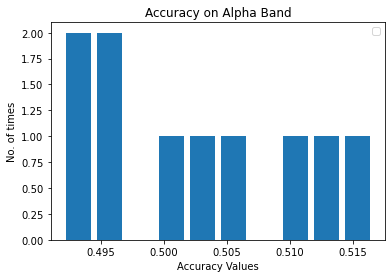

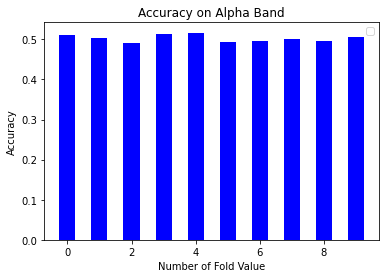

In [19]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(1)

plt.hist(results, bins = 10,rwidth=0.8)
plt.legend()
plt.xlabel('Accuracy Values')
plt.ylabel('No. of times')
plt.title('Accuracy on Alpha Band')
plt.show()

plt.figure(2)
a = np.arange(10)
plt.bar(a,results, color='b',width=.5)

plt.legend()
plt.xlabel('Number of Fold Value')
plt.ylabel('Accuracy')
plt.title('Accuracy on Alpha Band')
plt.show()

# Beta band 

In [20]:
#Reading 10 Subjects Alpha_band

import pandas as pd
import glob

path_1 = r'../input/decomposed-bands-14-subjects/Decomposed_5_bands_14_Subjects/Beta_band_merged.csv' # use your path

data_1 = pd.read_csv(path_1)

In [21]:
X1,y1 = data_1.loc[:,data_1.columns!='Labels'],data_1.Labels

In [22]:
X1

,Beta_AF7,Beta_AF8,Beta_TP9,Beta_TP10
0,-0.651888,2.315103,10.962900,8.871105
1,-0.483509,1.376235,9.112147,8.619785
2,-0.418851,0.463969,5.074676,4.826961
3,-0.494166,-1.339427,-7.907498,-8.477142
4,-0.378784,0.262013,-7.773415,-5.523073
...,...,...,...,...
109189,0.802827,-2.463051,-0.110441,-0.897920
109190,1.884434,-0.621130,-0.649163,-0.482331
109191,-2.574090,1.560461,0.659739,0.407248
109192,-2.559024,0.194142,5.201625,9.714896


In [23]:
from sklearn.utils import shuffle

Xtrain_shuffled, ytrain_shuffled = shuffle(X1,y1, random_state = 9876)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
Xtrain = scale.fit(Xtrain_shuffled)
Xtrain = scale.transform(Xtrain_shuffled)

In [25]:
from sklearn.model_selection import KFold, cross_val_score 
from keras import layers , models,regularizers 
import tensorflow as tf 

def build_model(): 
    
    model = models.Sequential()
    model.add(layers.BatchNormalization(input_shape=(4,)))
    model.add(layers.Dense(1,activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    
    return model 

In [26]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 

estimator= KerasClassifier(build_fn=build_model, epochs=5,verbose = 1)
kfold= KFold(n_splits=10)
results= cross_val_score(estimator, Xtrain, ytrain_shuffled, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()

Epoch 1/5
3072/3072 [==============================] - 9s 3ms/step - loss: 0.6931 - acc: 0.5074
Epoch 2/5
3072/3072 [==============================] - 9s 3ms/step - loss: 0.6931 - acc: 0.5029
Epoch 3/5
3072/3072 [==============================] - 8s 3ms/step - loss: 0.6930 - acc: 0.5081
Epoch 4/5
3072/3072 [==============================] - 9s 3ms/step - loss: 0.6931 - acc: 0.5032
Epoch 5/5
342/342 [==============================] - 1s 2ms/step - loss: 0.6932 - acc: 0.5004
Epoch 1/5
3072/3072 [==============================] - 9s 3ms/step - loss: 0.6933 - acc: 0.5045
Epoch 2/5
3072/3072 [==============================] - 8s 3ms/step - loss: 0.6931 - acc: 0.5051
Epoch 3/5
3072/3072 [==============================] - 8s 3ms/step - loss: 0.6931 - acc: 0.5058
Epoch 4/5
3072/3072 [==============================] - 9s 3ms/step - loss: 0.6931 - acc: 0.5039
Epoch 5/5
342/342 [==============================] - 1s 2ms/step - loss: 0.6931 - acc: 0.5051
Epoch 1/5
3072/3072 [=======================

0.5039105176925659

In [27]:
print("Accuracies per K-Fold on Beta_band ", results)
print("Mean Accuracy = ",results.mean())

Accuracies per K-Fold on Beta_band  [0.50036633 0.5051282  0.50283885 0.50283885 0.50004578 0.50105321
 0.50883782 0.5038923  0.50627345 0.50783038]
Mean Accuracy =  0.5039105176925659


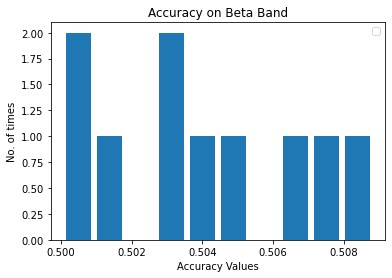

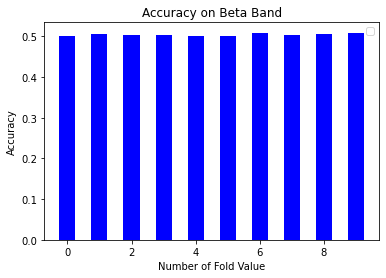

In [28]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(1)

plt.hist(results, bins = 10,rwidth=0.8)
plt.legend()
plt.xlabel('Accuracy Values')
plt.ylabel('No. of times')
plt.title('Accuracy on Beta Band')
plt.show()

plt.figure(2)
a = np.arange(10)
plt.bar(a,results, color='b',width=.5)

plt.legend()
plt.xlabel('Number of Fold Value')
plt.ylabel('Accuracy')
plt.title('Accuracy on Beta Band')
plt.show()

# Gamma Band

In [39]:
#Reading 10 Subjects Alpha_band

import pandas as pd
import glob

path_1 = r'../input/decomposed-bands-14-subjects/Decomposed_5_bands_14_Subjects/Gamma_band_merged.csv' # use your path

data_1 = pd.read_csv(path_1)

In [40]:
X1,y1 = data_1.loc[:,data_1.columns!='Labels'],data_1.Labels

In [41]:
from sklearn.utils import shuffle

Xtrain_shuffled, ytrain_shuffled = shuffle(X1,y1, random_state = 9876)

In [42]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
Xtrain = scale.fit(Xtrain_shuffled)
Xtrain = scale.transform(Xtrain_shuffled)

In [43]:
from sklearn.model_selection import KFold, cross_val_score 
from keras import layers , models,regularizers 
import tensorflow as tf 

def build_model(): 
    
    model = models.Sequential()
    model.add(layers.BatchNormalization(input_shape=(4,)))
    model.add(layers.Dense(1,activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    
    return model

In [44]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 

estimator= KerasClassifier(build_fn=build_model, epochs=5,verbose = 1)
kfold= KFold(n_splits=10)
results= cross_val_score(estimator, Xtrain, ytrain_shuffled, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()

Epoch 1/5
6061/6061 [==============================] - 18s 3ms/step - loss: 0.6943 - acc: 0.5000
Epoch 2/5
3678/6061 [=================>............] - ETA: 6s - loss: 0.6931 - acc: 0.5042

KeyboardInterrupt: 

In [ ]:
print("Accuracies per K-Fold on Gamma_band ", results)
print("Mean Accuracy = ",results.mean())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(1)

plt.hist(results, bins = 10,rwidth=0.8)
plt.legend()
plt.xlabel('Accuracy Values')
plt.ylabel('No. of times')
plt.title('Accuracy on Gamma Band')
plt.show()

plt.figure(2)
a = np.arange(10)
plt.bar(a,results, color='b',width=.5)

plt.legend()
plt.xlabel('Number of Fold Value')
plt.ylabel('Accuracy')
plt.title('Accuracy on Beta Band')
plt.show()

# Delta Band

In [ ]:
#Reading 10 Subjects Alpha_band

import pandas as pd
import glob

path_1 = r'../input/delta-decomposed-10-subjects/Delta_band_merged_All.csv' # use your path

data_1 = pd.read_csv(path_1)

In [ ]:
X1,y1 = data_1.loc[:,data_1.columns!='Labels'],data_1.Labels

In [ ]:
X1

In [ ]:
from sklearn.utils import shuffle

Xtrain_shuffled, ytrain_shuffled = shuffle(X1,y1, random_state = 9876)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
Xtrain = scale.fit(Xtrain_shuffled)
Xtrain = scale.transform(Xtrain_shuffled)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score 
from keras import layers , models,regularizers 
import tensorflow as tf 

def build_model(): 
    
    model = models.Sequential()
    model.add(layers.BatchNormalization(input_shape=(4,)))
    model.add(layers.Dense(1,activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    
    return model

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 

estimator= KerasClassifier(build_fn=build_model, epochs=5,verbose = 1)
kfold= KFold(n_splits=10)
results= cross_val_score(estimator, Xtrain, ytrain_shuffled, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()

In [ ]:
print("Accuracies per K-Fold on Delta_band ", results)
print("Mean Accuracy = ",results.mean())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(1)

plt.hist(results, bins = 10,rwidth=0.8)
plt.legend()
plt.xlabel('Accuracy Values')
plt.ylabel('No. of times')
plt.title('Accuracy on Delta Band')
plt.show()

plt.figure(2)
a = np.arange(10)
plt.bar(a,results, color='b',width=.5)

plt.legend()
plt.xlabel('Number of Fold Value')
plt.ylabel('Accuracy')
plt.title('Accuracy on Delta Band')
plt.show()

# Theta Band of 4 sensors

In [ ]:
#Reading AF8 Theta_for same product of 10 subjects

import pandas as pd
import glob

path = r'../input/theta-p1-4-sensors/Theta_band.csv' # use your path
#path = r'../input/alphap14sensors/Alpha_bands_P1.csv'

data_1 = pd.read_csv(path, index_col=None)

In [ ]:
X,y = data_1.loc[:,data_1.columns!='Labels'],data_1.Labels

In [ ]:
X.shape,y.shape

In [ ]:
X

In [ ]:
from sklearn.utils import shuffle

X_sh,y_sh = shuffle(X,y,random_state=9896)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

#scale = MinMaxScaler()
#X_tr = scale.fit(X_sh)
#X_tr = scale.transform(X_sh)

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_sh,y_sh,test_size = 0.01, shuffle=False)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

In [ ]:
from keras import models,layers

model = models.Sequential()
model.add(layers.BatchNormalization(input_shape=(4,)))
model.add(layers.Dense(1,activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.Dense(2,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
genius = model.fit(Xtrain,ytrain,epochs=20,validation_split=0.12)

In [ ]:
import numpy as np
hist_dict = genius.history

import matplotlib.pyplot as plt

#Storing the epochs as the length of the dictionary accuracy

epochs = np.arange(len(hist_dict['acc']))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training and Validation Accuracy Graph")
plt.plot(epochs+1,hist_dict['acc'],label='Training Accuracy')
plt.plot(epochs+1,hist_dict['val_acc'],label='Validation Accuracy')
plt.legend(loc='best')
plt.show()


In [ ]:
hist_dict['acc']

In [ ]:
test_loss, test_acc = model.evaluate(Xtest, ytest)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score 
from keras import layers , models,regularizers 
import tensorflow as tf 

def build_model(): 
    
    model = models.Sequential()
    model.add(layers.BatchNormalization(input_shape=(4,)))
    model.add(layers.Dense(1,activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    
    return model

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 

estimator= KerasClassifier(build_fn=build_model, epochs=20,verbose = 1)
kfold= KFold(n_splits=10)
results= cross_val_score(estimator, X_sh,y_sh, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()